In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("loan_data_set.csv")

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.drop("Loan_ID",1,inplace=True)

<AxesSubplot:>

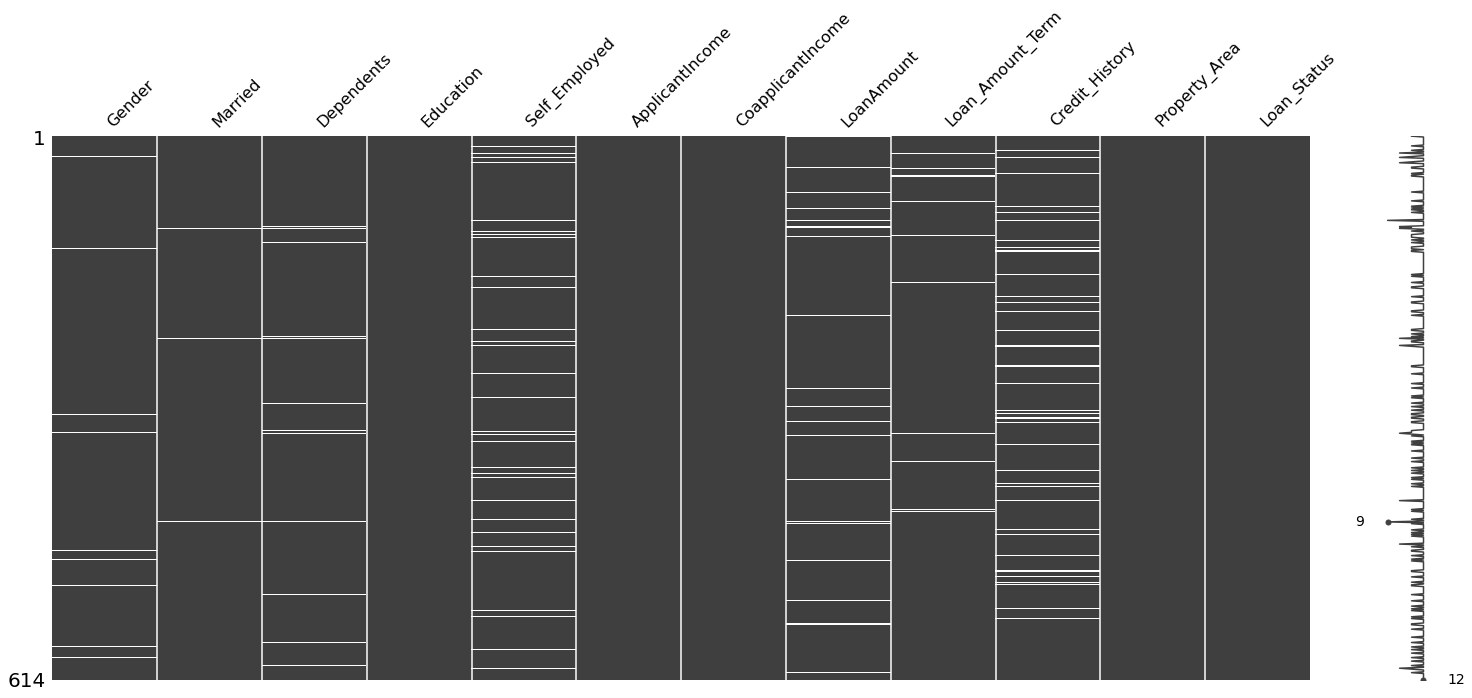

In [10]:
msno.matrix(df)

In [11]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# fills mean for numerical values and mode for non-numeric objects
def filmiss(a):
  for i in list(a.columns):
    if isinstance(a[i][0],(np.int64,np.float64)):
      a[i].fillna(a[i].mean(),inplace=True)
    else:
      a[i].fillna(a[i].mode()[0],inplace=True)
  return a

In [13]:
df = filmiss(df)

In [14]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

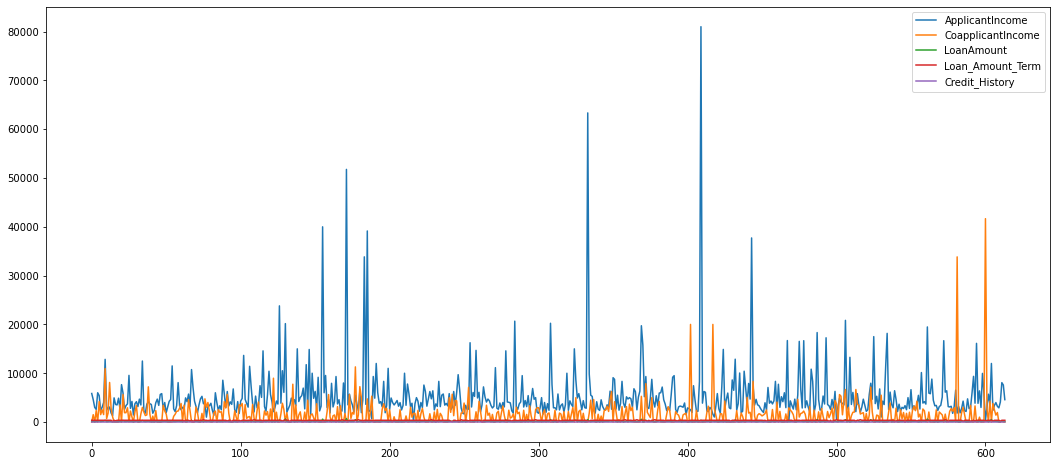

In [15]:
df.plot(figsize=(18, 8))
plt.show()


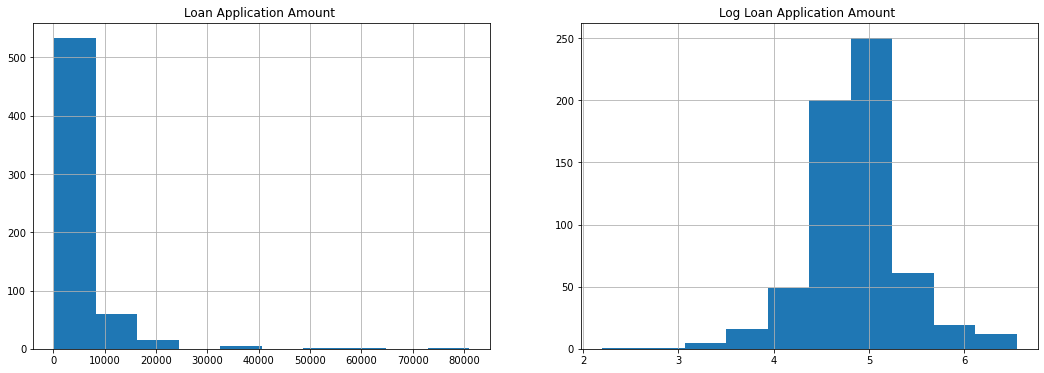

In [16]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

<AxesSubplot:>

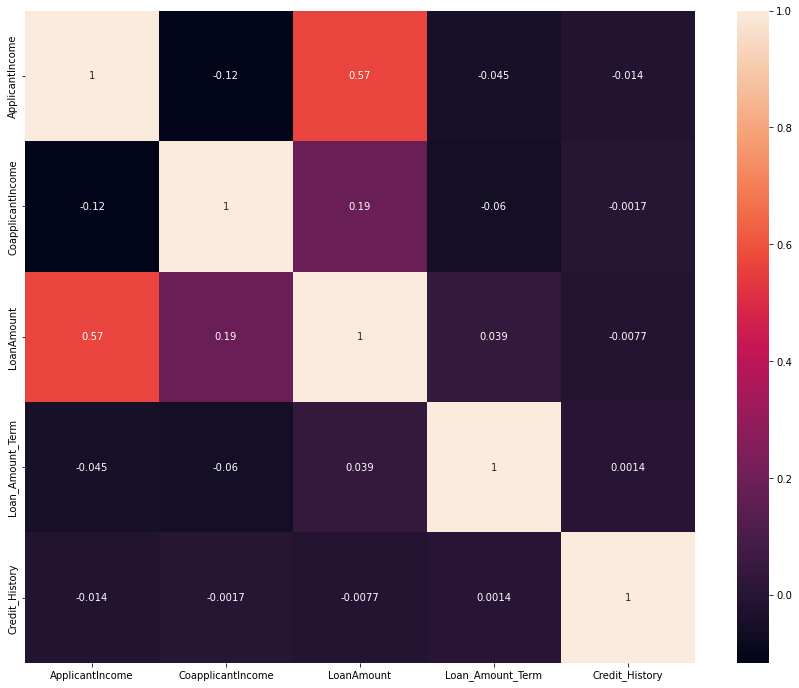

In [17]:
plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [19]:
df = pd.get_dummies(df,drop_first=True)

In [20]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

In [26]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svc = SVC()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
bc = BaggingClassifier()
ab = AdaBoostClassifier()

In [27]:
models = [lr,dt,svc,knc,rfc,bc,ab]

In [28]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits =5,random_state=0,shuffle=True)
for i in models:
  scores = cross_val_score(i,x_train,y_train,cv=cv,scoring='accuracy')
  print(f"{i} : {scores.mean()} ")

LogisticRegression() : 0.8004535147392289 
DecisionTreeClassifier() : 0.688373531230674 
SVC() : 0.8004741290455577 
KNeighborsClassifier() : 0.7700061842918986 
RandomForestClassifier() : 0.7759843331271903 
BaggingClassifier() : 0.7250051535765822 
AdaBoostClassifier() : 0.7780869923727065 


In [29]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',decision_function_shape='ovo',kernel='rbf',random_state=0)

In [30]:
svc.fit(x_train,y_train)

SVC(decision_function_shape='ovo', gamma='auto', random_state=0)

In [31]:
y_pred = svc.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        33
           1       0.82      0.96      0.88        90

    accuracy                           0.81       123
   macro avg       0.80      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123



In [34]:
import joblib
joblib.dump(svc,'loan_eligibility.pkl')

['loan_eligibility.pkl']

In [34]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
